## Machine Learning 실습 
### library import

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 불러오기 

In [ ]:
heart = pd.read_csv("heartdisease.csv")

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heart.describe()

age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall      output  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [ ]:
heart.shape

(303, 14)

### Nan값 제거

In [ ]:
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
# y 값 분포 확인
print(heart['output'].unique())

[1 0]


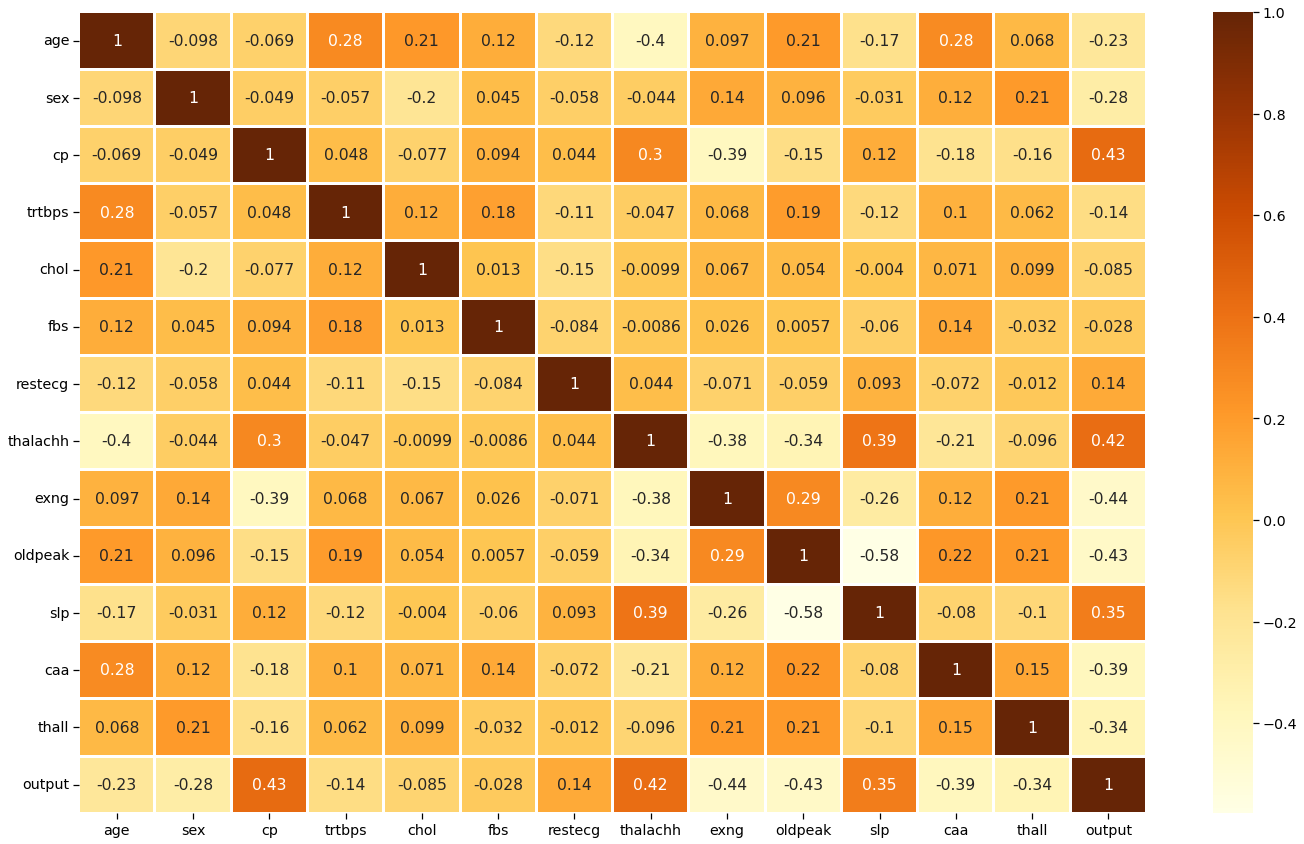

In [ ]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(heart.corr(),annot=True,linewidth =2, cmap = "YlOrBr")
plt.tight_layout()

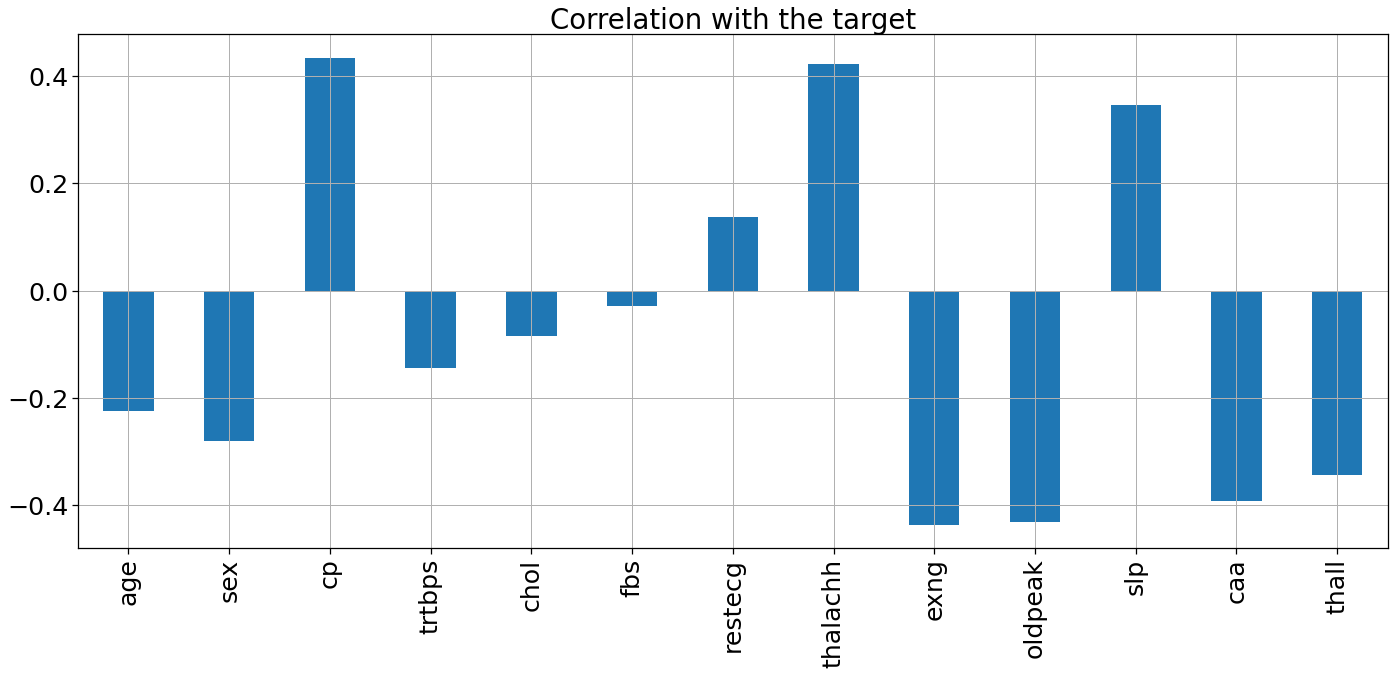

In [ ]:
sns.set_context('notebook',font_scale = 2.3)
heart.drop('output', axis=1).corrwith(heart.output).plot(kind='bar', grid=True, figsize=(20, 10), 
                                                        title="Correlation with the target")
plt.tight_layout()

## Categorical & Continuous Column 나누기




In [ ]:
cate_val = []
cont_val = []

for column in heart.columns:
    print("--------------------")
    print(f"{column} : {heart[column].unique()}")
    if len(heart[column].unique()) <= 10:
        cate_val.append(column)
    else:
        cont_val.append(column)

--------------------
age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
--------------------
sex : [1 0]
--------------------
cp : [3 2 1 0]
--------------------
trtbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
--------------------
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 

In [ ]:
print(len(cate_val), len(cont_val))

9 5


In [ ]:
# Target Variable이 one-hot encoding 과정에 들어와서는 안됨. 
cate_val.remove('output')
# One-Hot Encoding 
final_heart = pd.get_dummies(heart, columns = cate_val)
final_heart.head(6)

age  trtbps  chol  thalachh  oldpeak  output  sex_0  sex_1  cp_0  cp_1  \
0   63     145   233       150      2.3       1      0      1     0     0   
1   37     130   250       187      3.5       1      0      1     0     0   
2   41     130   204       172      1.4       1      1      0     0     1   
3   56     120   236       178      0.8       1      0      1     0     1   
4   57     120   354       163      0.6       1      1      0     1     0   
5   57     140   192       148      0.4       1      0      1     1     0   

   ...  slp_2  caa_0  caa_1  caa_2  caa_3  caa_4  thall_0  thall_1  thall_2  \
0  ...      0      1      0      0      0      0        0        1        0   
1  ...      0      1      0      0      0      0        0        0        1   
2  ...      1      1      0      0      0      0        0        0        1   
3  ...      1      1      0      0      0      0        0        0        1   
4  ...      1      1      0      0      0      0        0        0        1   
5  ...      0      1      0      0      0      0        0        1        0   

   thall_3  
0        0  
1        0  
2        0  
3        0  
4        0  
5        0  

[6 rows x 31 columns]

## 데이터 표준화 
#### Standardscaler : 데이터의 평균을 0 분산을 1로 조정하는 작업

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
cont_val

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [ ]:
sc = StandardScaler()
cont_variable = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
final_heart[cont_variable] = sc.fit_transform(final_heart[cont_variable])
final_heart.head(6)

age    trtbps      chol  thalachh   oldpeak  output  sex_0  sex_1  \
0  0.952197  0.763956 -0.256334  0.015443  1.087338       1      0      1   
1 -1.915313 -0.092738  0.072199  1.633471  2.122573       1      0      1   
2 -1.474158 -0.092738 -0.816773  0.977514  0.310912       1      1      0   
3  0.180175 -0.663867 -0.198357  1.239897 -0.206705       1      0      1   
4  0.290464 -0.663867  2.082050  0.583939 -0.379244       1      1      0   
5  0.290464  0.478391 -1.048678 -0.072018 -0.551783       1      0      1   

   cp_0  cp_1  ...  slp_2  caa_0  caa_1  caa_2  caa_3  caa_4  thall_0  \
0     0     0  ...      0      1      0      0      0      0        0   
1     0     0  ...      0      1      0      0      0      0        0   
2     0     1  ...      1      1      0      0      0      0        0   
3     0     1  ...      1      1      0      0      0      0        0   
4     1     0  ...      1      1      0      0      0      0        0   
5     1     0  ...      0      1      0      0      0      0        0   

   thall_1  thall_2  thall_3  
0        1        0        0  
1        0        1        0  
2        0        1        0  
3        0        1        0  
4        0        1        0  
5        1        0        0  

[6 rows x 31 columns]

### Train, Test 데이터 셋 분리 

### column 정보

| index | 변수 명 | 한글 변수 명 | 변수 설명 |
| ------ | :------ | :------ | :------ | 
| 1 | age | 나이 | range : 29~77 |
| 2 | sex | 성별 |M = male; F = female |
| 3 | cp(chest pain type) | 가슴 통증 타입 | 0 = typical angina; 1 = atypical angina; 2 = non-anginal pain; 3 = asymptomatic | 
| 4 | trestbps(resting blood pressure) | 혈압 | in mm Hg / range : 94~200 |
| 5 | chol(serum cholestoral) | 혈청 콜레스테롤 | in mg/dl / range : 126~564|
| 6 | fbs(fasting blood sugar) | 공복 혈당 | 1 = true; 0 = false (fasting blood sugar > 120 mg/dl) |
| 7 | restecg(resting electrocardiographic results) | 심전도 | 0 = normal; 1 = having ST-T wave abnormality; 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria |
| 8 | thalach(maximum heart rate achieved) | 최대 심장박동 수 | range : 71~202 |
| 9 | exang(exercise induced angina) | 운동 유발 협심증 | 1 = yes; 0 = no | 
| 10 | oldpeak (ST depression induced by exercise relative to rest) | ST 우울증 | range : 0~6.2|
| 11 | slope(the slope of the peak exercise ST segment) | ST segment 기울기 | 1 = upsloping; 2 = flat; 3 = downsloping
| 12 | ca(number of major vessels) | 혈관 수 | 0, 1, 2, 3, 4 |
| 13 | thal | 빈혈 여부 | 3 = normal; 6 = fixed defect; 7 = reversable defect |
| 14 | target | 심장질환 여부 | 0 = normal; 1 = heartdisease |

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = final_heart.drop('output', axis=1)
y = final_heart.output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(242, 30) (61, 30) (242,) (61,)


------
## Supervised Learning 
* KNN (K-Nearest Neighbors)
* Logistic Regression 
* Decision Tree 
* Support Vector Machine 
### KNN (K-Nearest Neighbors)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNeighborsClassifier()

In [ ]:
print("훈련 세트 정확도 : {0:.3f}".format())
print("테스트 세트 정확도: {0:.2f}".format())

훈련 세트 정확도 : 0.876
테스트 세트 정확도: 0.90


### n_neighbors 갯수에 따라 train과 test 정확도의 차이 비교 그래프



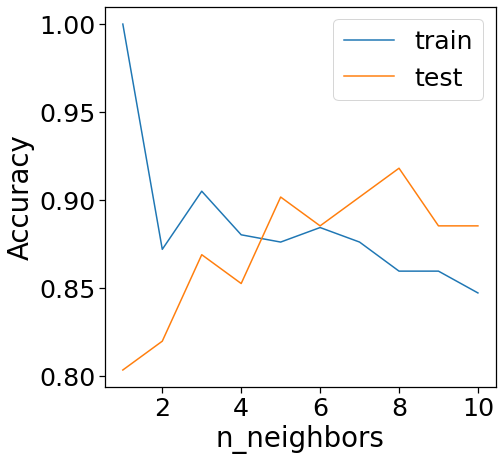

In [ ]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(knn_model.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(knn_model.score(X_test, y_test))

plt.figure(figsize=(7,7))
plt.plot(neighbors_settings, training_accuracy, label="train")
plt.plot(neighbors_settings, test_accuracy, label="test")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

--------
## Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression

LogisticRegression(random_state=42)

In [ ]:
print("훈련 세트 정확도 : {0:.3f}".format())
print("테스트 세트 정확도: {0:.2f}".format())

훈련 세트 정확도 : 0.876
테스트 세트 정확도: 0.89


### 각 feature들의 계수(coefficients)를 확인
* 어떤 feature가 생존에 큰 영향을 주는지 확인하기 위해서임. 

In [ ]:
logistic_clf.coef_

array([[ 0.13960626, -0.33839303, -0.11315015,  0.27980626, -0.6023308 ,
         0.6792305 , -0.67924769, -1.08905239, -0.25134782,  0.55635366,
         0.78402936, -0.21603372,  0.21601652, -0.17378094,  0.23896989,
        -0.06520614,  0.4574183 , -0.45743549, -0.18584895, -0.50418793,
         0.69001969,  1.41465507, -0.73700618, -1.0805463 , -0.3262671 ,
         0.72914732,  0.02477317,  0.27718397,  0.47925117, -0.7812255 ]])

### ROC curve

ROC curve는 다양한 threshold에 대한 이진 분류기의 성능을 한번에 확인할 수 있는 방법 

* 이진 분류의 성능은 True Positive Rate와 False Positive Rate 두 가지를 이용하여 표현 
* ROC curve는 좌상단에 붙어 있는 curve일수록 더 좋은 분류기임. 
* FPR (False Positive Rate)와 True Positive Rate (TPR)은 ROC 커브에서 각각 x,y축에 표시되는 값을 의미 

* 예시 : https://angeloyeo.github.io/2020/08/05/ROC.html


In [ ]:
from sklearn.metrics import roc_curve 

In [ ]:
def plot_roc_curve(fper, tper):
    plt.figure(figsize = (10,10))
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

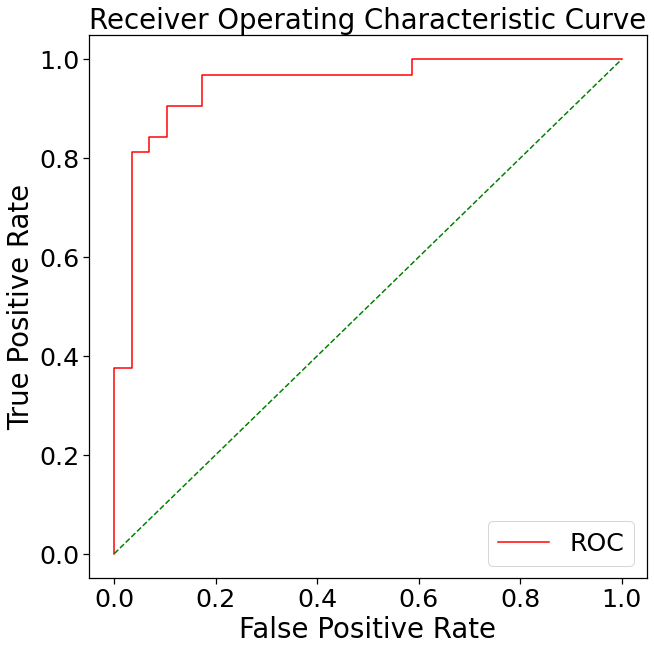

In [ ]:
prob = logistic_clf.predict_proba(X_test)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(y_test, prob)
plot_roc_curve(fper, tper)

------

### Decision Tree

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve 

#### 모델 학습 

DecisionTreeClassifier(max_depth=3, random_state=42)

#### 모델 성능 평가 

In [ ]:
print("훈련 세트 정확도 : {0:.3f}".format())
print("테스트 세트 정확도: {0:.2f}".format())

훈련 세트 정확도: 0.85
테스트 세트 정확도: 0.820


#### Feature importance 확인 
* 특성 중요도는 0 ~ 1 사이의 숫자로 이루어짐
* 다시 말해, 0은 전혀 사용하지 않았다는 뜻이고 1은 완벽하게 타깃을 예측할 때 사용되었다고 볼 수 있음 

In [ ]:
pd.DataFrame(index=X.columns,data=tree_clf.feature_importances_,columns=['Feature Importance']).sort_values(by = 'Feature Importance', ascending = False)

Feature Importance
thall_2              0.473835
cp_0                 0.205921
caa_0                0.151040
oldpeak              0.108990
thalachh             0.060214
age                  0.000000
exng_1               0.000000
thall_1              0.000000
thall_0              0.000000
caa_4                0.000000
caa_3                0.000000
caa_2                0.000000
caa_1                0.000000
slp_2                0.000000
slp_1                0.000000
slp_0                0.000000
restecg_2            0.000000
exng_0               0.000000
trtbps               0.000000
restecg_1            0.000000
restecg_0            0.000000
fbs_1                0.000000
fbs_0                0.000000
cp_3                 0.000000
cp_2                 0.000000
cp_1                 0.000000
sex_1                0.000000
sex_0                0.000000
chol                 0.000000
thall_3              0.000000

#### 학습된 Decision Tree 모델 시각화 

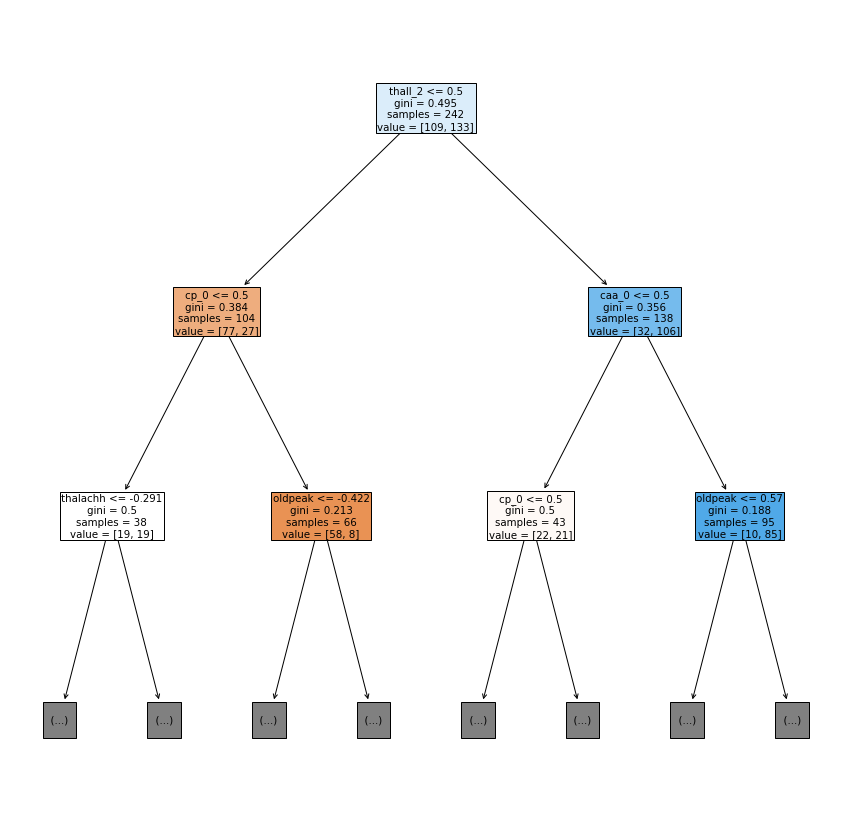

In [ ]:
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(tree_clf,
                   max_depth= 2, 
                   feature_names= X_train.columns, 
                   filled=True)

### Support Vector Machine 

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix 

* C(cost) : 이론에서 배운 주요 파라미터로써 어느 정도의 오차를 허용할지에 대한 파라미터입니다.

* kernel : 어떤 커널함수를 사용할지에 대한 파라미터입니다. 'linear', 'sigmoid', 'rbf', 'poly'가 활용됩니다.

* degree : 어느 차수까지의 다항차수로 분류를 할 지에 대한 파라미터입니다. 커널함수가 'poly' 일 때 사용됩니다.

* gamma : 곡률 경계에 대한 파라미터입니다. 'rbf', 'poly', 'sigmoid'일 때 튜닝하는 값입니다. 즉, gamma가 클수록 한 데이터 포인트들이 영향력을 행사하는 거리가 짧아지는 반면, gamma가 낮을수록 커진다. 

In [ ]:
svm_clf = SVC(kernel= , gamma=, C=)


SVC(gamma=0.1, kernel='linear')

In [ ]:
print("훈련 세트 정확도 : {0:.3f}".format())
print("테스트 세트 정확도: {0:.2f}".format())

훈련 세트 정확도: 0.88
테스트 세트 정확도: 0.869


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


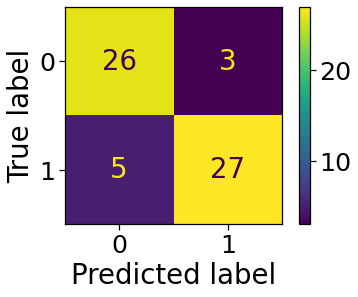

In [ ]:
plot_confusion_matrix(svm_clf, X_test, y_test)
plt.show()

----
## Ensemble Model 
* Random Forest 
* Adaboost 
* XGboost
### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
for_clf = RandomForestClassifier(n_estimators=, max_depth=, random_state=42)


RandomForestClassifier(max_depth=3, n_estimators=50, random_state=42)

훈련 세트 정확도: 0.86
테스트 세트 정확도: 0.885


### Feature Importance

In [ ]:
feature_scores = pd.DataFrame(index=X.columns,data=for_clf.feature_importances_,columns=['Feature Importance']).sort_values(by = 'Feature Importance', ascending = False)

In [ ]:
feature_scores

Feature Importance
thall_2              0.163579
cp_0                 0.120365
thalachh             0.085566
oldpeak              0.085223
caa_0                0.081887
thall_3              0.080723
exng_0               0.072534
exng_1               0.066973
slp_2                0.053950
age                  0.041051
sex_0                0.021906
slp_1                0.017868
cp_2                 0.017341
sex_1                0.015313
caa_1                0.013437
trtbps               0.012788
cp_1                 0.008240
chol                 0.008100
caa_3                0.007238
caa_2                0.006920
cp_3                 0.003662
restecg_0            0.003288
fbs_1                0.002887
restecg_1            0.002416
caa_4                0.002170
fbs_0                0.002138
thall_1              0.000990
slp_0                0.000784
restecg_2            0.000665
thall_0              0.000000

### ROC Curve

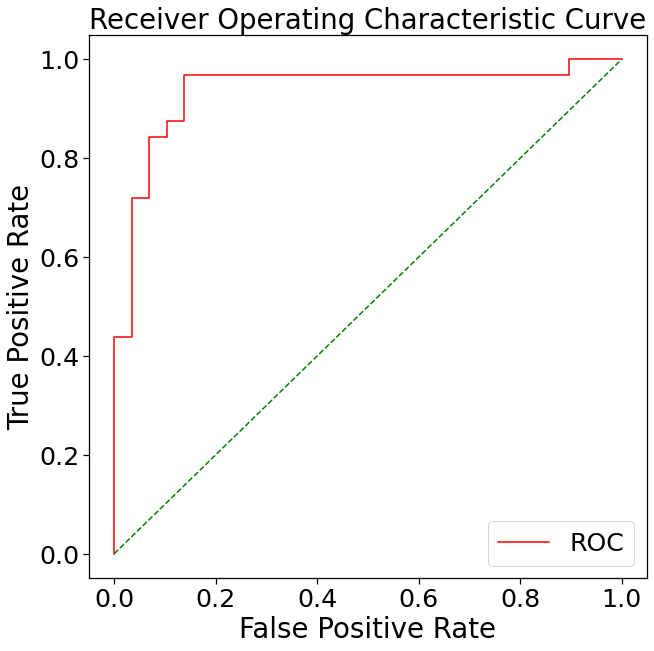

In [ ]:
prob = for_clf.predict_proba(X_test)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(y_test, prob)
plot_roc_curve(fper, tper)

## Adaboost & Gradient Boosting Machine

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

AdaBoostClassifier(learning_rate=0.1, random_state=42)

훈련 세트 정확도: 0.87
테스트 세트 정확도: 0.836


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


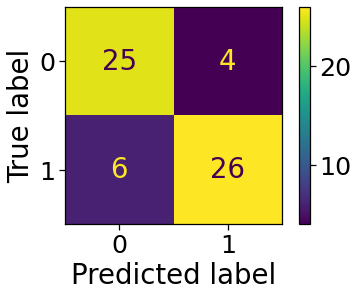

In [ ]:
plot_confusion_matrix(ada_clf, X_test, y_test)
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GradientBoostingClassifier(random_state=42)

훈련 세트 정확도: 1.00
테스트 세트 정확도: 0.869


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


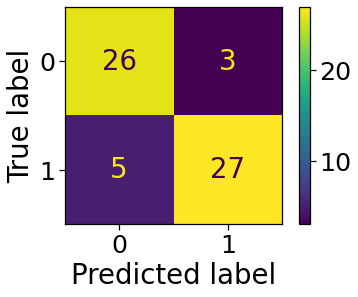

In [ ]:
plot_confusion_matrix(gbm_clf, X_test, y_test)
plt.show()

## Unsupervised Learning 
* PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
heart_scaled = StandardScaler().fit_transform(heart.iloc[:, :-1])

In [ ]:
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
pca.fit(heart_scaled)
PC = pca.transform(heart_scaled)

In [ ]:
pca.explained_variance_ratio_

array([0.21254053, 0.11820708])

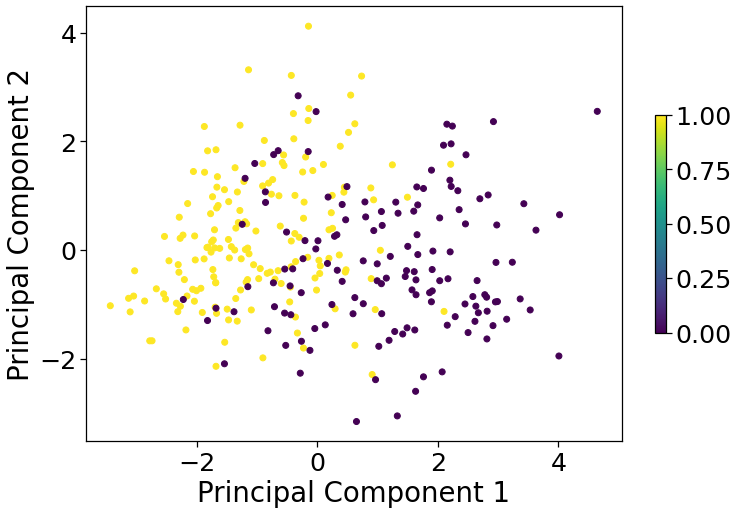

In [ ]:
plt.figure(figsize=[12,8])
plt.scatter(PC[:,0], PC[:,1], c=heart.output)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(shrink=0.5)